# Hierarchical clustering 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 hierarchical clustering
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
#!pip3 install --user sklearn
#!pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

載入 toy example 資料集

In [3]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]

設定 模型 估計參數

#### AgglomerativeClustering
   - n_clusters   default:2  The number of clusters to find. It must be None if distance_threshold is not None.
   - affinity   default: "euclidean" 距離計算方式 "euclidean", "l1", "l2", "manhattan", "cosine", or "precomputed"
   - linkage   default:  "ward"  分群距離標準 "ward"最小化變異數, "complete"群間最遠兩點距離, "average"群間個點距離平均, "single"群間最近兩點距離

In [4]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

資料建模 並 視覺化 結果

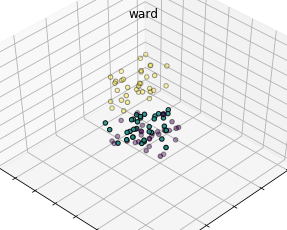

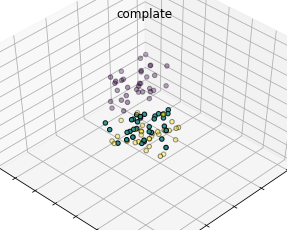

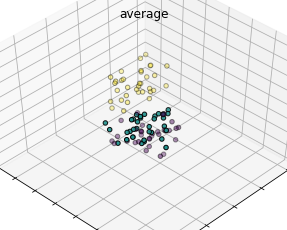

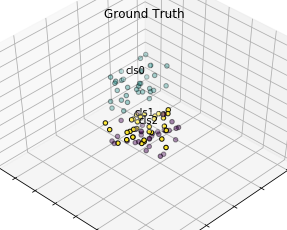

In [5]:
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 7
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 7

#fig.show()

# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [7]:
print("Shape: ", iris.data.shape)
print("Features: ", iris.feature_names)
print("Target: ", iris.target_names)

Shape:  (150, 4)
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target:  ['setosa' 'versicolor' 'virginica']


In [8]:
from sklearn.cluster import AgglomerativeClustering

estimators = [("hc_ward", AgglomerativeClustering(n_clusters=3, linkage='ward')),
              ("hc_complete", AgglomerativeClustering(n_clusters=3, linkage='complete')),
              ("hc_average", AgglomerativeClustering(n_clusters=3, linkage='average'))]

In [9]:
def get_auc(label_temp):
    
    percentage_all = []
    types = len(set(label_temp))
    for i in range(types):
        a,b = np.unique(label_temp[:50], return_counts=True)
        label_temp = label_temp[50:]
        
        correct_count = 50
        while len(a)!=1:
            correct_count = (correct_count - min(b))
            a = np.delete(a, list(b).index(min(b)))
        
        percentage_all.append(correct_count/sum(b))
    percentage_all.append("Average:"+str(round(sum(percentage_all)/len(percentage_all),4)*100)+"%")
        
    return percentage_all

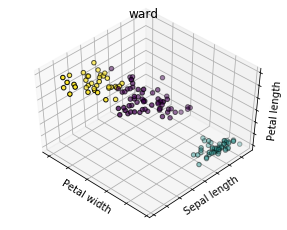

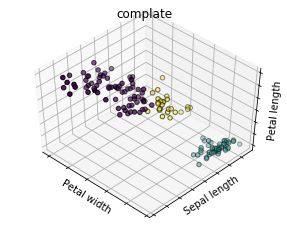

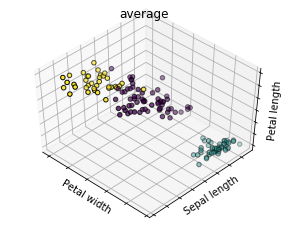

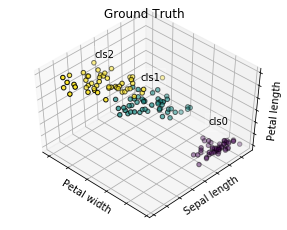

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

auc = {}
fignum = 1
titles = ['ward', 'complate', 'average']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_
    auc[name] = get_auc(labels)

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel('Petal width', labelpad=-10)
    ax.set_ylabel('Sepal length', labelpad=-10)
    ax.set_zlabel('Petal length', labelpad=-10)
    
    ax.set_title(titles[fignum - 1])
    ax.dist = 10
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Petal width', labelpad=-10)
ax.set_ylabel('Sepal length', labelpad=-10)
ax.set_zlabel('Petal length', labelpad=-10)

ax.set_title('Ground Truth')
ax.dist = 10

#fig.show()

In [11]:
auc

{'hc_ward': [1.0, 0.98, 0.7, 'Average:89.33%'],
 'hc_complete': [1.0, 0.54, 0.98, 'Average:84.0%'],
 'hc_average': [1.0, 1.0, 0.72, 'Average:90.67%']}